In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading in the data
df_cleveland = pd.read_csv("/Users/mani/Desktop/heart-disease-predictor/data/cleveland_data.csv", index_col=0)

In [3]:
df_cleveland.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,1
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df_cleveland.dropna(inplace=True)

In [7]:
# Importing the k means clustering class
from sklearn.cluster import KMeans

def find_optimal_k(data, num_clusters):
    """
    Creates a graph of the cumulative distortion of a k-means clustering model as a function of the number of clusters
    param data: A dataframe or numpy array with features
    param num_clusters: An integer that specifies the number of clusters that will be shown in the graph
    return: Uses plt.show() to display the graph
    """
    # For storing the distortion, the sum of squared distances of samples to their closest cluster center, for each iterations
    distortions = []
    
    # Trying different values for k, between 1 and num_clusters
    for k in range(1, num_clusters):
        # Defining a k means model with the value of k for the iteration and with 100 iterations max
        kmeans = KMeans(n_clusters=k, 
                        max_iter=100)
    
        # Fitting the k means model to the dimensionality reduced customer data
        kmeans.fit(data)
    
        # Appending the distortion value to the list
        distortions.append(kmeans.inertia_)
        
    # Creating a graph of the cumulative distortion as a function of the number of components
    plt.plot(distortions)
    # Adding a title
    plt.title("Distortion vs The Number of Clusters")
    # Adding a label for the x-axis
    plt.xlabel("Number of Clusters")
    # Adding a label for the y-axis
    plt.ylabel("Distortion")
    
    # Displaying the graph
    plt.show()

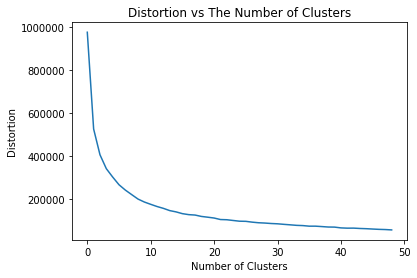

In [8]:
# Creating an elbow plot
find_optimal_k(df_cleveland, 50)


In [9]:
# Normalizing the data to help decrease the cumulative distortion

# Getting only the numerical column so that they can be scaled
num_cols = ["age", "trest", "chol", "thalach", "oldpeak", "ca"]

# Importing the scalar
from sklearn.preprocessing import MinMaxScaler

# Create the scalar object
scaler = MinMaxScaler()

# Scale the numerical columns into a 0 to 1 range
df_cleveland[num_cols]= scaler.fit_transform(df_cleveland[num_cols])

In [10]:
df_cleveland.head()

,age,sex,cp,trest,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,0.708333,1.0,1.0,0.481132,0.367698,1.0,2.0,0.603053,0.0,0.370968,3.0,0.000000,6.0,0
1,0.791667,1.0,4.0,0.622642,0.549828,0.0,2.0,0.282443,1.0,0.241935,2.0,1.000000,3.0,1
2,0.791667,1.0,4.0,0.245283,0.353952,0.0,2.0,0.442748,1.0,0.419355,2.0,0.666667,7.0,1
3,0.166667,1.0,3.0,0.339623,0.426117,0.0,0.0,0.885496,0.0,0.564516,3.0,0.000000,3.0,0
4,0.250000,0.0,2.0,0.339623,0.268041,0.0,2.0,0.770992,0.0,0.225806,1.0,0.000000,3.0,0
